<a href="https://colab.research.google.com/github/samdvies/pyTorchDeepLearnIntro/blob/main/04_ML_Logistic_sd2323.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1 [40 marks]

In the provided code, the network's performance was assessed using the same training dataset for both training and evaluation, which is not a recommended practice in evaluating machine learning algorithms. Your task is to adjust the code to split the data into two separate sets: a training set and a testing set. The training set should account for 80% of the original data, while the remaining 20% will constitute the test data. Additionally, as part of your report, you should address the following points:

1. **Importance of Having Two Datasets**: In your report, discuss the significance of using two distinct datasets (training and testing) when evaluating a machine learning algorithm.

2. **Code for Data Splitting**: Provide the code you used to divide the original dataset into the training and testing datasets. Ensure that the split is random and maintains data integrity.

3. **Confusion Matrix and Accuracy**: After modifying the code and training the model on the training dataset, calculate the confusion matrix and total accuracy of the algorithm using the testing dataset. Include these performance metrics in your report to assess the model's effectiveness in classifying data.

Please ensure that your code is well-documented and your report provides clear explanations of the concepts discussed.


Training samples: 120
Testing samples: 30
iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.00141667 0.01115    0.0130875 ] 	
iteration: 101 	 cost: 0.40794289595732897 	 weights: [-0.05588709 -0.09415578  0.4294503 ] 	
iteration: 201 	 cost: 0.30613730120965427 	 weights: [-0.11259674 -0.2498409   0.70045062] 	
iteration: 301 	 cost: 0.2425281406905338 	 weights: [-0.15692725 -0.36970005  0.91682871] 	
iteration: 401 	 cost: 0.20013780049598803 	 weights: [-0.19286325 -0.46577868  1.09466474] 	
iteration: 501 	 cost: 0.1702392772265611 	 weights: [-0.22289905 -0.54540531  1.24472666] 	
iteration: 601 	 cost: 0.14815623147656135 	 weights: [-0.24862156 -0.61314996  1.37414342] 	
iteration: 701 	 cost: 0.1312320111660807 	 weights: [-0.27107818 -0.67198428  1.48774294] 	
iteration: 801 	 cost: 0.11786983482599848 	 weights: [-0.29098734 -0.72392289  1.5888964 ] 	
iteration: 901 	 cost: 0.10706109798602162 	 weights: [-0.30885943 -0.77038346  1.68003007] 	
iteration: 1001 	 cost: 0.0

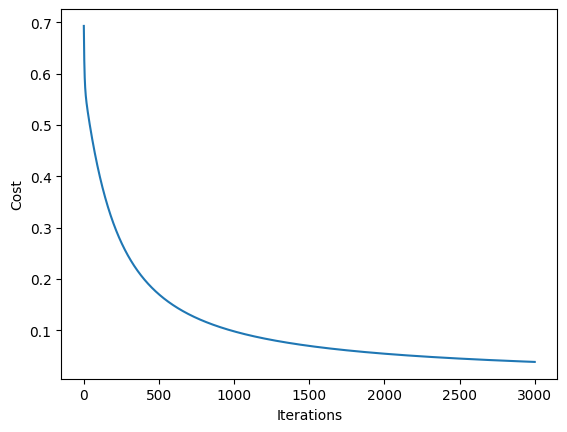


Confusion matrix (Test Set): 
[[ 7.  0.]
 [ 0. 23.]]
Test Accuracy = 100.00%


In [18]:

def train_test_split(X, y, test_size=0.2, random_state=42):

    # Set random seed for reproducibility
    np.random.seed(random_state)

    # Create shuffled indices
    indices = np.random.permutation(len(X))

    # Calculate split index
    split_idx = int(len(X) * (1 - test_size))

    train_indices = indices[:split_idx]
    test_indices = indices[split_idx:]

    # Create subsets
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

alpha = 0.01
num_iter = 3000
trained_weights = fit(alpha, num_iter, X_train, y_train)

# 3. Evaluate using ONLY testing data
predictions_test = predict(X_test, trained_weights)
pred_test = predictions_test.astype('int')
true_test = y_test.astype('int')

# 4. Confusion Matrix and Accuracy
conf_matrix_test = compute_confusion_matrix(true_test, pred_test)
print('\nConfusion matrix (Test Set): ')
print(conf_matrix_test)

diagonal_sum = conf_matrix_test.trace()
sum_of_all_elements = conf_matrix_test.sum()
test_accuracy = diagonal_sum / sum_of_all_elements
print('Test Accuracy = {:0.2f}%'.format(test_accuracy*100))

## Task 2 [20 marks]

In the provided code, the primary objective was to classify Iris-Setosa versus other classes. Your task is to modify the code so that it can classify Iris-Versicolor versus other classes and Iris-Virginica versus other classes separately. For each case, you should divide the dataset into training and testing subsets. Additionally, your report should cover the following aspects:

1. **Dataset Adjustment Code**: Provide the code you used to adjust the dataset for each classification scenario, ensuring that you have separate training and testing data for Iris-Versicolor versus other classes and Iris-Virginica versus other classes.

2. **Reporting Weights**: Present the final weights obtained for each classification case.

3. **Performance Comparison**: Compare the performance of the network for each classification case. Discuss any differences in performance and provide justifications for why the performance may vary between the two cases. Consider factors such as dataset characteristics and class separability.

Ensure that your code modifications are clearly documented, and your report provides insightful explanations for the observed differences in classification performance.


Shape of X: (150, 3)
Shape of labels: (150,)

--- Processing Versicolor vs. Others ---
iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.00175   0.009775  0.0044875] 	
iteration: 101 	 cost: 0.6222664178969822 	 weights: [ 0.0354482   0.15676772 -0.08163052] 	
iteration: 201 	 cost: 0.6083638661281934 	 weights: [ 0.05144212  0.2207225  -0.17865011] 	
iteration: 301 	 cost: 0.6002259298866598 	 weights: [ 0.06228189  0.27034106 -0.252684  ] 	
iteration: 401 	 cost: 0.5953297409920475 	 weights: [ 0.06931856  0.30932998 -0.30998571] 	
iteration: 501 	 cost: 0.5923106280653467 	 weights: [ 0.07350655  0.34032345 -0.35488849] 	
iteration: 601 	 cost: 0.5904080331158228 	 weights: [ 0.0755292   0.36521682 -0.39044434] 	
iteration: 701 	 cost: 0.589185192133165 	 weights: [ 0.07588424  0.38539619 -0.41884618] 	
iteration: 801 	 cost: 0.5883843690000111 	 weights: [ 0.07494061  0.4018922  -0.44170111] 	
iteration: 901 	 cost: 0.5878498373676228 	 weights: [ 0.07297619  0.41548321 -0.4602

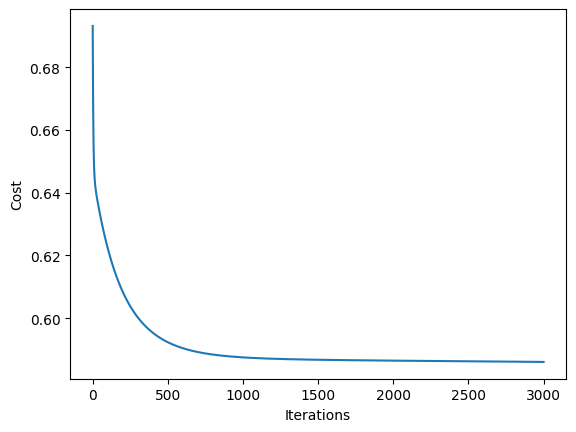

Final Weights for Versicolor: [-0.0376281   0.49811254 -0.5496151 ]
Confusion Matrix:
[[ 0. 11.]
 [ 1. 18.]]
Accuracy: 60.00%

--- Processing Virginica vs. Others ---
iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.00183333 0.00809167 0.00077083] 	
iteration: 101 	 cost: 0.5512307406263122 	 weights: [ 0.08197051  0.23244716 -0.25472661] 	
iteration: 201 	 cost: 0.48153625375260156 	 weights: [ 0.13981786  0.37329746 -0.46892556] 	
iteration: 301 	 cost: 0.4376199370764489 	 weights: [ 0.18754292  0.48664646 -0.63772893] 	
iteration: 401 	 cost: 0.4076417531308795 	 weights: [ 0.22837715  0.5812228  -0.77634361] 	
iteration: 501 	 cost: 0.3858124244852444 	 weights: [ 0.26433318  0.66247571 -0.89402639] 	
iteration: 601 	 cost: 0.36909419813889527 	 weights: [ 0.29669994  0.73390612 -0.99657756] 	
iteration: 701 	 cost: 0.35577636667381835 	 weights: [ 0.32633424  0.79784815 -1.08777942] 	
iteration: 801 	 cost: 0.3448333823493357 	 weights: [ 0.35382693  0.85591524 -1.17019732] 

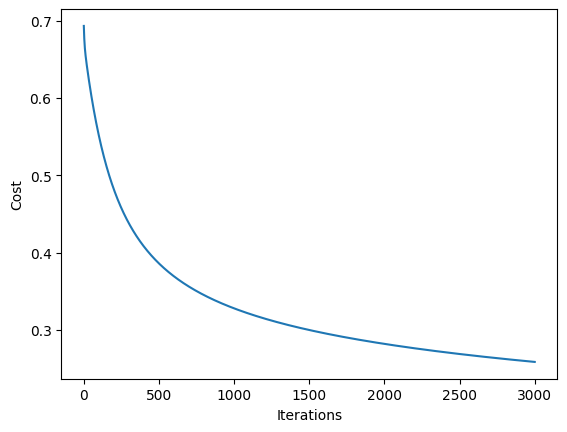

Final Weights for Virginica: [ 0.76229354  1.59472364 -2.20790423]
Confusion Matrix:
[[12.  0.]
 [ 1. 17.]]
Accuracy: 96.67%



In [20]:
labels = iris_data.iloc[:, 4]
X = iris_data.iloc[:, [0, 2]]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

print(f"Shape of X: {X.shape}")
print(f"Shape of labels: {labels.shape}\n")

def train_test_split(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    split_idx = int(len(X) * (1 - test_size))
    train_indices, test_indices = indices[:split_idx], indices[split_idx:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

def run_classification_task(class_name, target_label_index, X_original, labels_original):
    print(f"--- Processing {class_name} vs. Others ---")


    y_task = np.where(labels_original == target_label_index, 0, 1)

    X_train, X_test, y_train, y_test = train_test_split(X_original, y_task, test_size=0.2)

    # Fit Model
    w = fit(0.01, 3000, X_train, y_train)

    print(f"Final Weights for {class_name}: {w}")

    # Evaluate
    preds = predict(X_test, w).astype('int')

    true_y = y_test.astype('int')
    cm = compute_confusion_matrix(true_y, preds)

    # Calculate Accuracy
    acc = cm.trace() / cm.sum()

    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {acc*100:.2f}%\n")

# Iris Indices: 0=Setosa, 1=Versicolor, 2=Virginica

# Run for Versicolor
run_classification_task("Versicolor", 1, X, labels)

# Run for Virginica
run_classification_task("Virginica", 2, X, labels)

The significant difference in accuracy between the two cases stems from the linear separability of the classes and the limitations of Logistic Regression, which creates a linear decision boundary to separate data. The Iris-Virginica classifier performs well because the Virginica data points are clustered at one extreme of the feature space, allowing the model to easily draw a single line that separates them from the combined cluster of Setosa and Versicolor. In contrast, the Iris-Versicolor classifier performs poorly because the Versicolor data points are geometrically situated in the middle, sandwiched between the smaller Setosa and larger Virginica points. Since a standard Logistic Regression model cannot draw a single straight line that isolates a middle cluster from data points on both opposing sides, it fails to classify Versicolor effectively without feature engineering to introduce non-linearity.


## Task 3 [40 marks]

In this tutorial, you were introduced to the parameter $\alpha$, also known as the learning rate. A fixed value of $0.01$ was chosen for our algorithm. Your task is to investigate the effect of selecting different values of $\alpha$ for the Iris-Setosa vs. All classifier. In your report, please cover the following aspects:

1. **Variation of $\alpha$**: Experiment with different values of $\alpha$ (e.g., 0.0001, 0.1, 1, 100). Note that you may want to print the loss more frequently to observe the initial behavior of the algorithm when using different $\alpha$ values.

2. **Code Execution**: Run the code for each of the specified $\alpha$ values and record the performance of the network for each case.

3. **Visualisation**: Include a graphical representation of the cost versus epochs for each $\alpha$ value. Additionally, report the accuracy of the test data and provide confusion matrices for each $\alpha$ value.

4. **Discussion**: In your own words, explain why the performance of the algorithm changes when using different $\alpha$ values. Discuss the effect of the learning rate on the gradient descent process, considering aspects like convergence speed, stability, and the risk of overshooting.

Ensure that your code adjustments are well-documented, and your report provides clear insights into the impact of varying the learning rate on the performance of the Iris-Setosa vs. All classifier.



Training with alpha = 0.0001
Test Accuracy: 76.67%
Confusion Matrix:
[[ 0.  7.]
 [ 0. 23.]]

Training with alpha = 0.01
Test Accuracy: 100.00%
Confusion Matrix:
[[ 7.  0.]
 [ 0. 23.]]

Training with alpha = 1
Test Accuracy: 100.00%
Confusion Matrix:
[[ 7.  0.]
 [ 0. 23.]]

Training with alpha = 100


/tmp/ipython-input-490554598.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Test Accuracy: 100.00%
Confusion Matrix:
[[ 7.  0.]
 [ 0. 23.]]


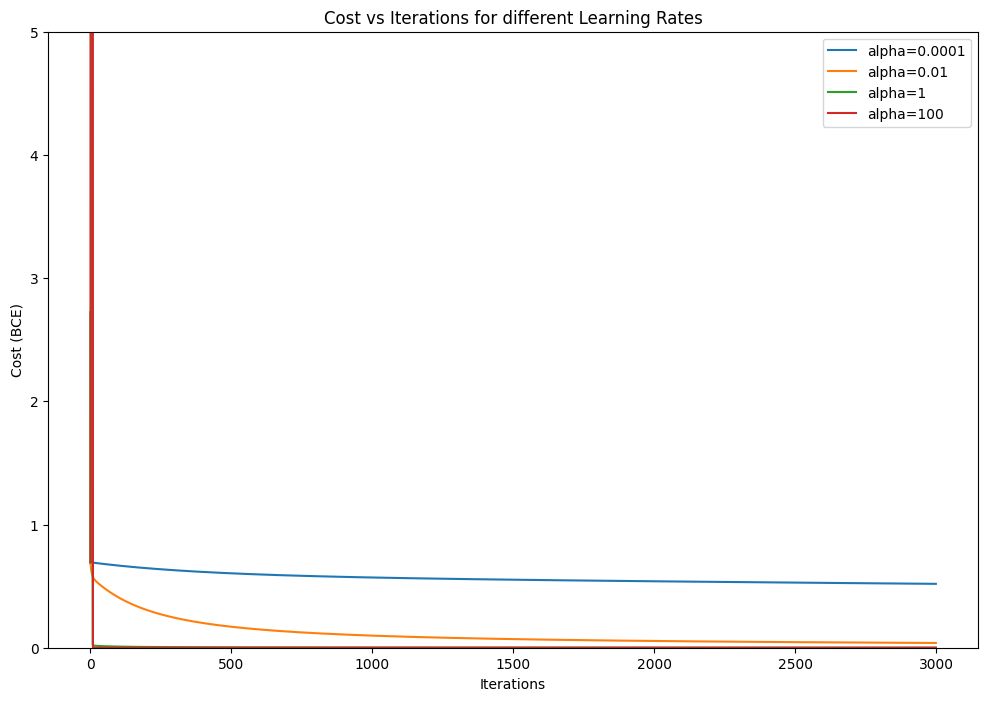

In [21]:

learning_rates = [0.0001, 0.01, 1, 100]
num_iter = 3000

# Prepare Setosa Data again
y_setosa = np.where(labels == 0, 0, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y_setosa, test_size=0.2)

plt.figure(figsize=(12, 8))

for alpha in learning_rates:
    print(f"\nTraining with alpha = {alpha}")

    # Custom fit function to return loss history for plotting
    # (Copying logic from original fit function but returning loss list)
    W = np.zeros(X_train.shape[1])
    loss_list = []

    for i in range(num_iter):
        z = np.dot(X_train, W)
        Y_pred = sigmoid(z)
        # Gradient Update Rule
        W += alpha * (np.dot(X_train.T, (y_train - Y_pred)) / y_train.size)
        current_loss = cost(Y_pred, y_train)
        loss_list.append(current_loss)

    # Plotting
    plt.plot(range(len(loss_list)), loss_list, label=f'alpha={alpha}')

    # Evaluation
    preds = predict(X_test, W).astype('int')
    cm = compute_confusion_matrix(y_test.astype('int'), preds)
    acc = cm.trace() / cm.sum()
    print(f"Test Accuracy: {acc*100:.2f}%")
    print(f"Confusion Matrix:\n{cm}")

plt.title("Cost vs Iterations for different Learning Rates")
plt.xlabel("Iterations")
plt.ylabel("Cost (BCE)")
plt.legend()
plt.ylim(0, 5) # Limit y-axis to see details better (ignore massive divergence)
plt.show()

At the lowest setting ($\alpha=0.0001$), the model achieved only 76.67% accuracy and failed to correctly classify any of the Setosa samples (as shown by the confusion matrix), indicating that the optimization step size was too small to converge to the solution within the fixed number of iterations. In contrast, both $\alpha=0.01$ and $\alpha=1$ resulted in optimal performance, achieving 100% accuracy and perfect separation of the classes. However, the trial with $\alpha=100$ highlights an issue: while the figure shows it achieved 100% accuracy—likely because scaling up the weight vector preserves the linear decision boundary in this specific case. It triggered a 'RuntimeWarning: overflow encountered in exp'. This error confirms that the weights grew uncontrollably large, causing numerical instability in the sigmoid calculation, which makes the model mathematically unreliable despite the high accuracy score.